In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df=pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
1,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
2,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
3,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
4,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


In [82]:
df.shape

(891, 12)

# Data Preprocessing

In [83]:
df=df.drop(columns=['PassengerId','Name','Cabin','Ticket'])
# these columns are not required

In [84]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [85]:
# Checking data types
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [86]:
if df.duplicated().equals(True):
    print('pass')
else:
    print('not work')

not work


In [87]:
# check the duplicate vaues
df[df.duplicated()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
16,0,1,male,62.00,0,0,26.5500,S
70,1,2,female,50.00,0,0,10.5000,S
122,0,3,male,44.00,0,0,8.0500,S
173,0,2,male,39.00,0,0,13.0000,S
202,1,2,female,36.00,0,0,13.0000,S
...,...,...,...,...,...,...,...,...
750,0,3,male,19.00,0,0,7.8958,S
772,0,2,male,18.00,0,0,11.5000,S
785,0,3,male,17.00,0,0,8.6625,S
790,0,3,male,17.00,0,0,8.6625,S


In [88]:
# check the unique values
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

In [89]:
# check the null values
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [90]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [91]:
# fill the null values
df['Embarked']=df['Embarked'].fillna('S')

In [92]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [93]:
# typeCasting the age 
df['Age']=df['Age'].astype(int)

In [94]:
df['Age'].dtypes

dtype('int32')

In [95]:
# replace the male with 1 and female with 0
df['Sex'] = df['Sex'].replace(['male','female'],[1,0])

In [96]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,1,80,0,0,30.0000,S
1,0,3,1,74,0,0,7.7750,S
2,0,1,1,71,0,0,34.6542,C
3,0,1,1,71,0,0,49.5042,C
4,0,3,1,70,0,0,7.7500,Q


# Categorising in groups i.e. Infant(0-5), Teen (6-20), 20s(21-30), 30s(31-40), 40s(41-50), 50s(51-60), Elder(61-100)

In [97]:
df['Age']=pd.cut(x=df['Age'],bins=[0, 5, 20, 30, 40, 50, 60, 100],labels = ['Infant', 'Teen', '20s', '30s', '40s', '50s', 'Elder'])

In [98]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,1,Elder,0,0,30.0000,S
1,0,3,1,Elder,0,0,7.7750,S
2,0,1,1,Elder,0,0,34.6542,C
3,0,1,1,Elder,0,0,49.5042,C
4,0,3,1,Elder,0,0,7.7500,Q


# Exploratory Data Analysis

# Plotting the Countplot to visualize the numbers

<AxesSubplot:xlabel='Parch', ylabel='count'>

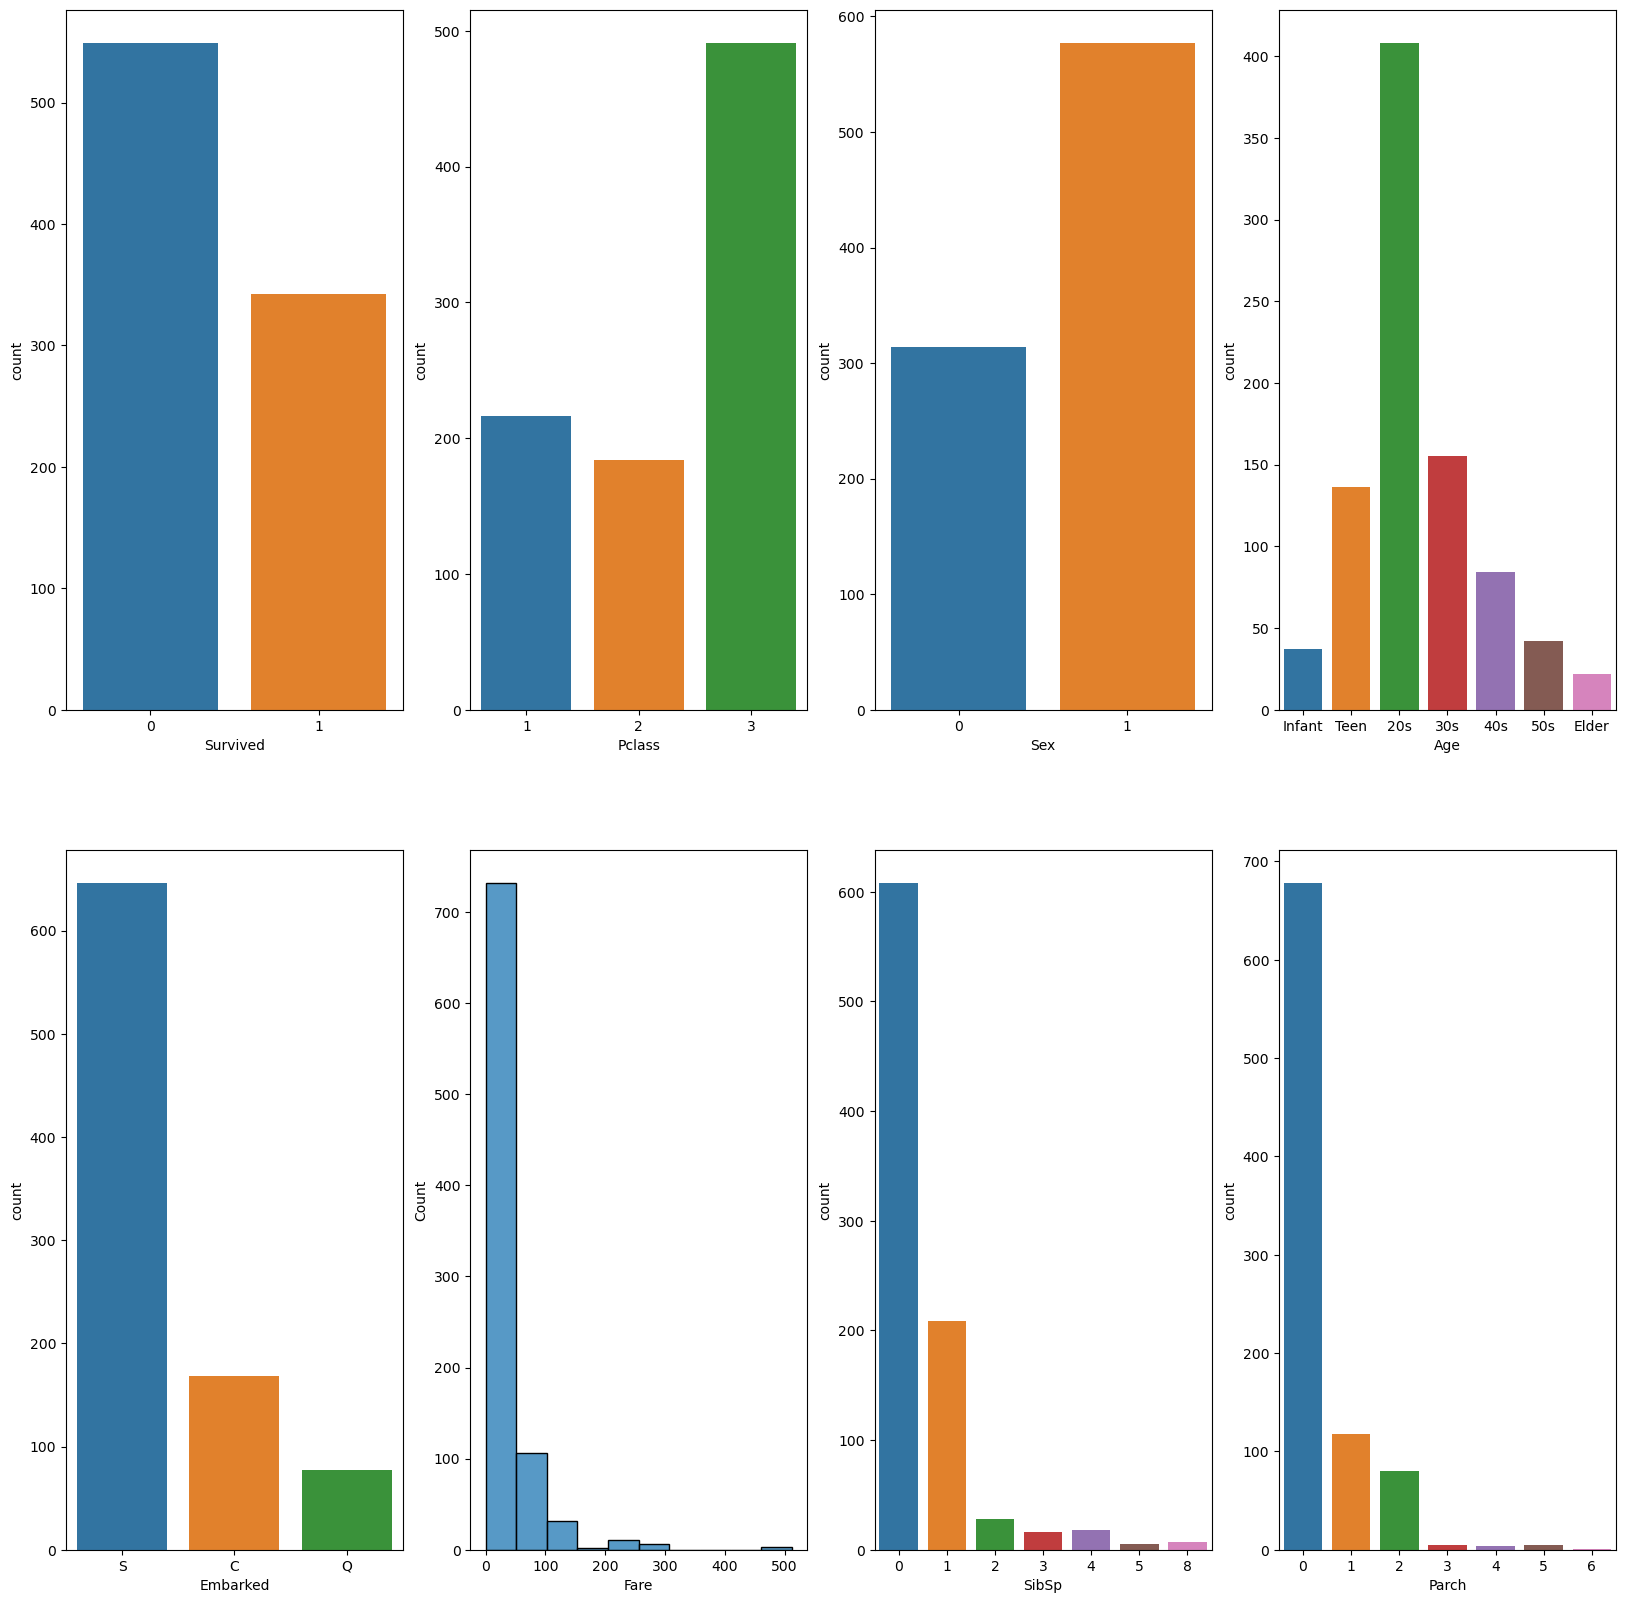

In [99]:
fig,ax=plt.subplots(2,4,figsize=(20,20))
sns.countplot(x = 'Survived', data = df, ax= ax[0,0])
sns.countplot(x = 'Pclass', data = df, ax=ax[0,1])
sns.countplot(x = 'Sex', data = df, ax=ax[0,2])
sns.countplot(x = 'Age', data = df, ax=ax[0,3])
sns.countplot(x = 'Embarked', data = df, ax=ax[1,0])
sns.histplot(x = 'Fare', data= df, bins=10, ax=ax[1,1])
sns.countplot(x = 'SibSp', data = df, ax=ax[1,2])
sns.countplot(x = 'Parch', data = df, ax=ax[1,3])

# Visualizing the replationship between the features

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

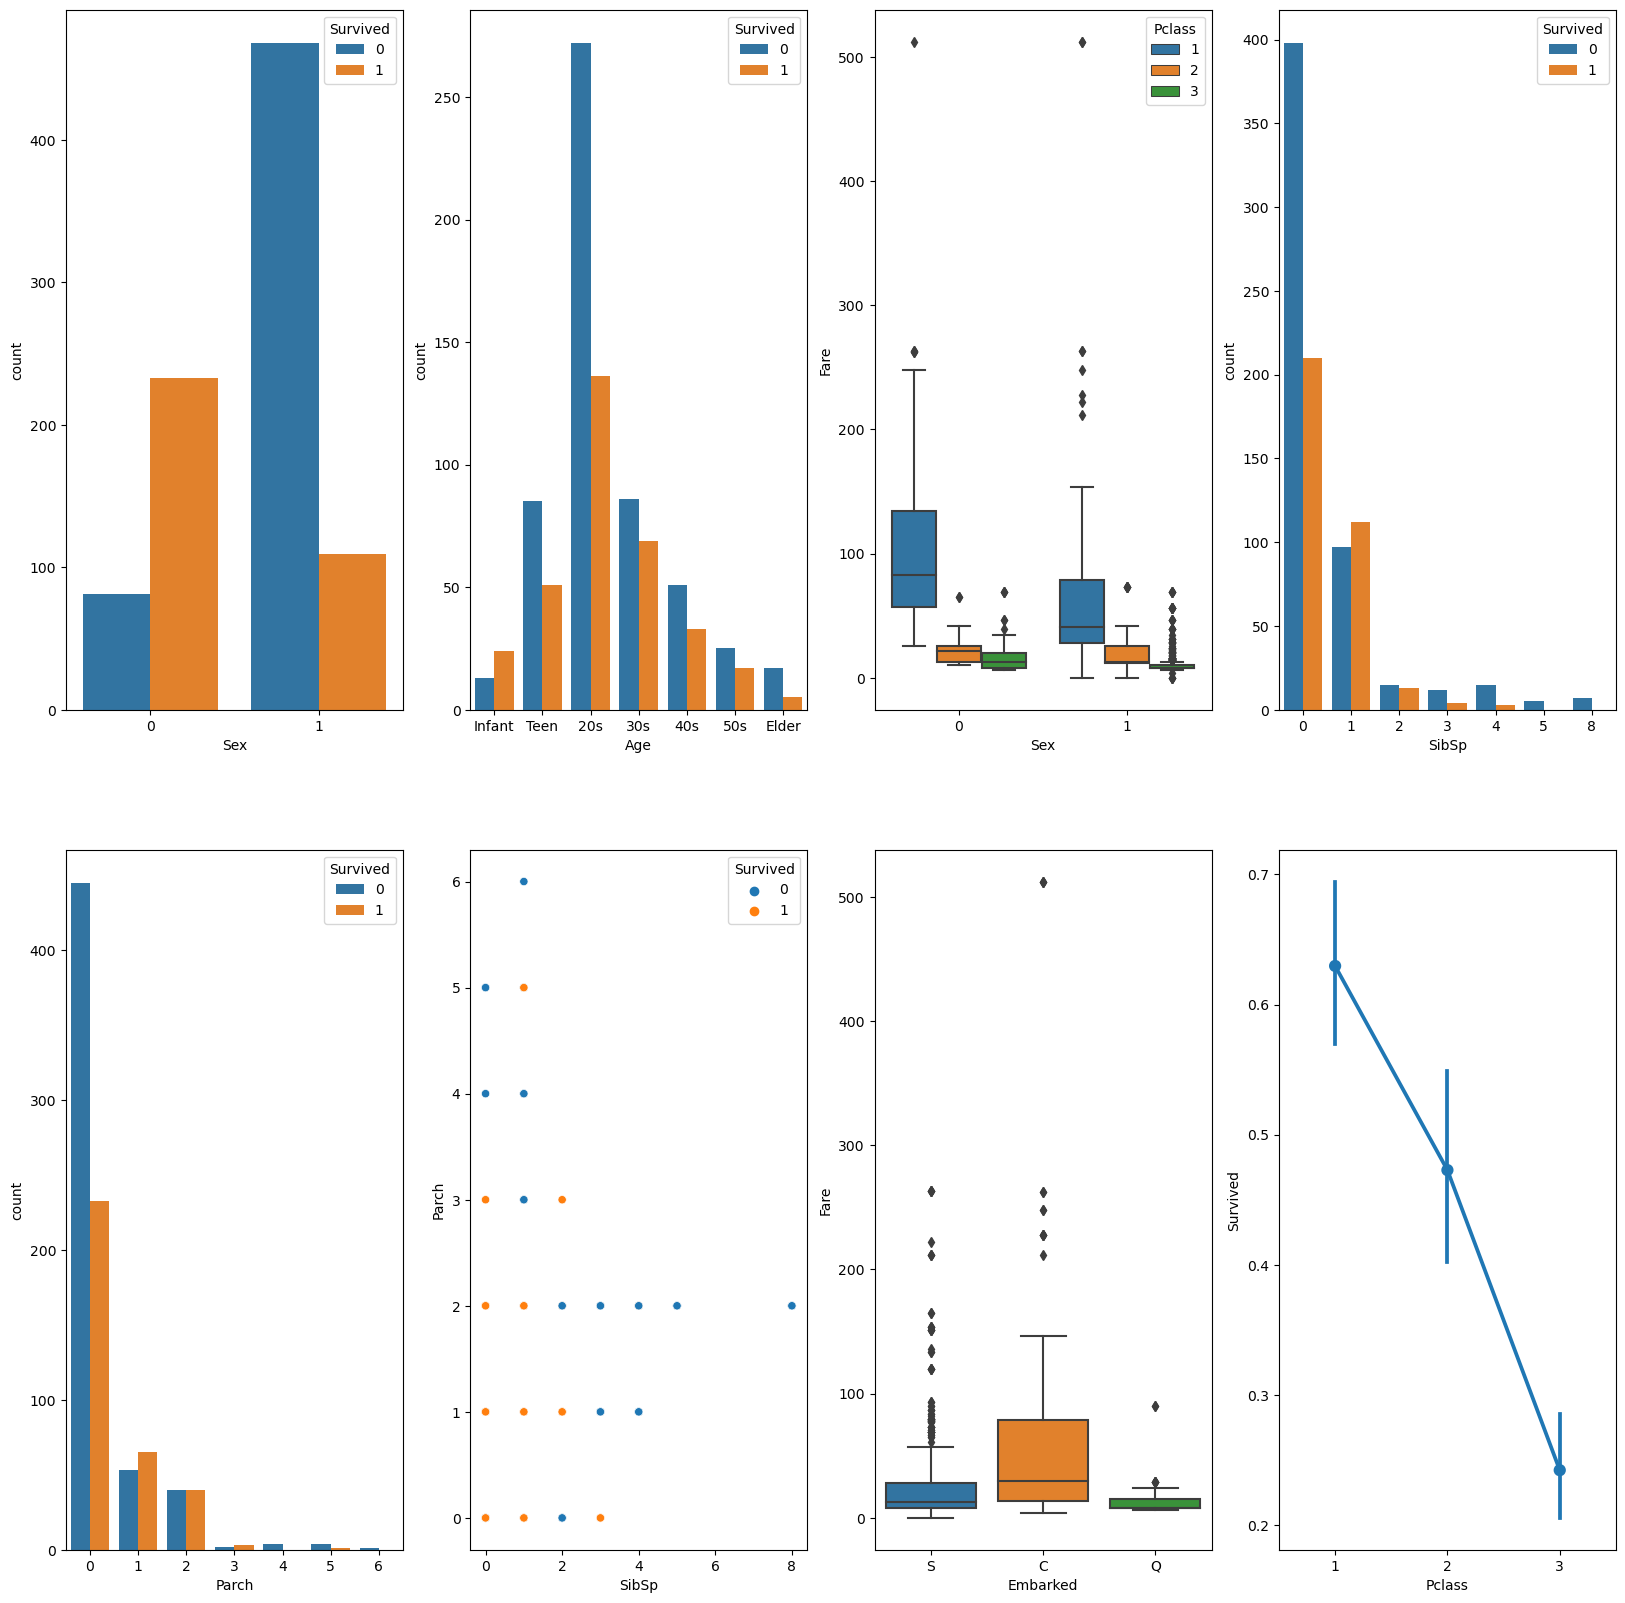

In [100]:
fig, ax = plt.subplots(2,4,figsize=(20,20))
sns.countplot(x = 'Sex', data = df, hue = 'Survived', ax= ax[0,0])
sns.countplot(x = 'Age', data = df, hue = 'Survived', ax=ax[0,1])
sns.boxplot(x = 'Sex',y='Fare', data = df, hue = 'Pclass', ax=ax[0,2])
sns.countplot(x = 'SibSp', data = df, hue = 'Survived', ax=ax[0,3])
sns.countplot(x = 'Parch', data = df, hue = 'Survived', ax=ax[1,0])
sns.scatterplot(x = 'SibSp', y = 'Parch', data = df,hue = 'Survived', ax=ax[1,1])
sns.boxplot(x = 'Embarked', y ='Fare', data = df, ax=ax[1,2])
sns.pointplot(x = 'Pclass', y = 'Survived', data = df, ax=ax[1,3])

# sns.countplot(x = 'Sex', data = df, hue = 'Survived', ax= ax[0,0]) from this plot we can say most of the females are saved and most of the males get died

In [101]:
# data preprocessing part 2

In [102]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [103]:
df['Embarked']=le.fit_transform(df['Embarked'])

In [104]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,1,Elder,0,0,30.0000,2
1,0,3,1,Elder,0,0,7.7750,2
2,0,1,1,Elder,0,0,34.6542,0
3,0,1,1,Elder,0,0,49.5042,0
4,0,3,1,Elder,0,0,7.7500,1


In [105]:
age_mapping = {
    'infant': 0,
    'teen': 1,
    '20s': 2,
    '30s': 3,
    '40s': 4,
    '50s': 5,
    'elder': 6}
df['Age'] = df['Age'].map(age_mapping)
df.dropna(subset=['Age'], axis= 0, inplace = True)

In [106]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
22,1,1,0,5.0,1,0,75.25,0
23,1,1,1,5.0,1,1,79.20,0
24,0,2,1,5.0,1,1,39.00,2
25,0,1,1,5.0,0,0,26.55,2
26,0,3,1,5.0,0,0,7.25,2


In [107]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.368620,-0.573774,0.065153,0.010829,0.045720,0.292395,-0.163990
Pclass,-0.368620,1.000000,0.157109,-0.340482,0.005724,0.017737,-0.537150,0.190956
Sex,-0.573774,0.157109,1.000000,-0.018460,-0.148791,-0.273454,-0.205106,0.086813
Age,0.065153,-0.340482,-0.018460,1.000000,-0.032035,0.088488,0.143326,0.035232
SibSp,0.010829,0.005724,-0.148791,-0.032035,1.000000,0.328171,0.168440,0.056640
Parch,0.045720,0.017737,-0.273454,0.088488,0.328171,1.000000,0.180414,0.019184
Fare,0.292395,-0.537150,-0.205106,0.143326,0.168440,0.180414,1.000000,-0.254945
Embarked,-0.163990,0.190956,0.086813,0.035232,0.056640,0.019184,-0.254945,1.000000


<AxesSubplot:>

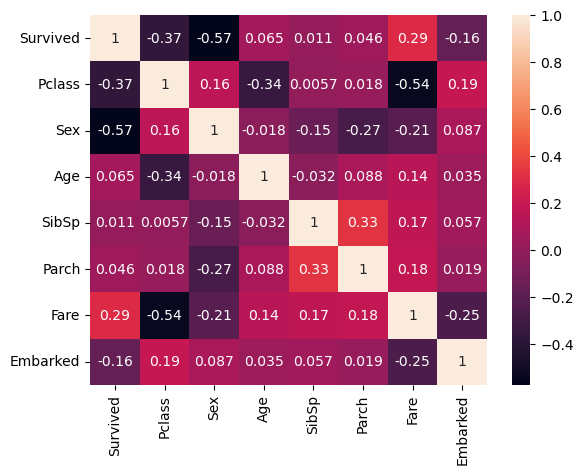

In [109]:
# plot the correlation
sns.heatmap(df.corr(),annot=True)

# separate the train and test

In [110]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [111]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
22,1,0,5.0,1,0,75.25,0
23,1,1,5.0,1,1,79.20,0
24,2,1,5.0,1,1,39.00,2
25,1,1,5.0,0,0,26.55,2
26,3,1,5.0,0,0,7.25,2


# try different model

In [112]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [113]:
lr.fit(X,y)

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [114]:
lr.score(X,y)

0.818577648766328

In [115]:
# desiccon tree

In [116]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
dtr=DecisionTreeClassifier()

In [118]:
dtr.fit(X,y)
dtr.score(X,y)

0.9404934687953556

In [119]:
# SVM

In [120]:
from sklearn.svm import SVC
svc=SVC()

In [121]:
svc.fit(X,y)
svc.score(X,y)

0.7024673439767779

In [122]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X,y)
knn.score(X,y)

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8127721335268505

In [123]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X,y)
rfc.score(X,y)

0.9404934687953556

In [124]:
# from above we can say desicion tree and random forest are the best for this classification

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [128]:
# lets do the hyperparameter

In [129]:
params={
    'n_estimators':[100,200,300],
    'criterion':['gini','entropy'],
    'max_depth':[5,10,15]
}

In [130]:
from sklearn.model_selection import RandomizedSearchCV
hpt=RandomizedSearchCV(rfc,param_distributions=params,cv=5,verbose=3,scoring='accuracy')
hpt.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=entropy, max_depth=15, n_estimators=300;, score=0.769 total time=   1.4s
[CV 2/5] END criterion=entropy, max_depth=15, n_estimators=300;, score=0.825 total time=   0.9s
[CV 3/5] END criterion=entropy, max_depth=15, n_estimators=300;, score=0.796 total time=   1.0s
[CV 4/5] END criterion=entropy, max_depth=15, n_estimators=300;, score=0.786 total time=   1.0s
[CV 5/5] END criterion=entropy, max_depth=15, n_estimators=300;, score=0.806 total time=   1.0s
[CV 1/5] END criterion=entropy, max_depth=5, n_estimators=100;, score=0.798 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=5, n_estimators=100;, score=0.854 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=5, n_estimators=100;, score=0.825 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=5, n_estimators=100;, score=0.825 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=5, n_estimators=100;, score=0.806 tot

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=3)

In [131]:
hpt.best_params_

{'n_estimators': 100, 'max_depth': 5, 'criterion': 'entropy'}

In [135]:
y_pred=hpt.predict(X_test)

In [134]:
from sklearn.metrics import accuracy_score,classification_report

In [136]:
score=accuracy_score(y_test,y_pred)

In [137]:
score

0.7803468208092486

In [138]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

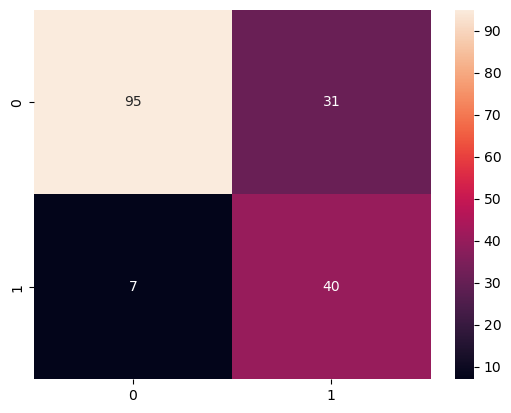

In [139]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)